In [439]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [440]:
ft_to_ev_inverse = 1544855.50049
v_sense = 10**(-6)
V0 = 3000
R1 = 2 * ft_to_ev_inverse
R2 = 2.5 * ft_to_ev_inverse
R1_unconverted = 2
R2_unconverted = 2.5

In [441]:
def Delta_V(epsilon,m):
    param = (epsilon**2)/m
    numerator = R1_unconverted*np.sinh(m*R2) - R2_unconverted*np.sinh(m*R1)
    denominator = R1_unconverted*R2*np.exp(m*R2) + param*R1_unconverted*np.sinh(m*R2)
    return V0*param*numerator/denominator

In [442]:
number_of_epsilon = 2000
number_of_m = 2000

In [443]:
epsilon_list = np.logspace(-10,0,number_of_epsilon) #this is the base 10 exponent range

In [444]:
m_list = np.logspace(-13,-4,number_of_m)

In [445]:
Delta_V_evaluated = np.zeros(shape=(number_of_epsilon,number_of_m))
for (i,m) in enumerate(m_list):
    for (j,epsilon) in enumerate(epsilon_list):
        Delta_V_evaluated[i][j] = Delta_V(epsilon,m)

In [446]:
#check whether the potential difference is larger than v_sensitivity. If so, already eliminated by experiment
#if still smaller, then it's still possible
Delta_V_possible = Delta_V_evaluated<v_sense

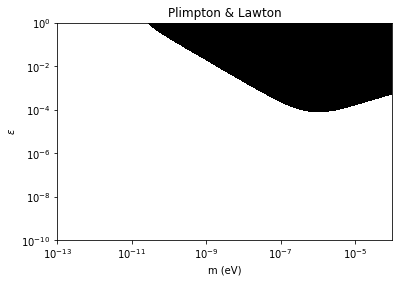

In [447]:
plt.pcolormesh(m_list,epsilon_list,Delta_V_possible.T,cmap="gray") #always plot the transpose with colormesh
plt.xscale("log")
plt.yscale("log")
plt.ylabel('$\epsilon$')
plt.xlabel('m (eV)')
plt.title("Plimpton & Lawton")
plt.savefig("Plimpton & Lawton.png",dpi=300)